<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">University of London: BSc Computer Science (Final Project)</div>
<div style="text-align: center; font-size: 30px; margin-top: 10px;">Using Neural Network based Graph Model for Alzhiemer's Classification</div>
<br>
<div style="text-align: center; font-size: 20px; margin-top: 10px;">Pragya Modi</div>
<div style="text-align: center; font-size: 20px; margin-top: 15px;">190308090</div>

<div style="font-size: 70px; font-weight: bold; border-bottom: 6px solid black; padding-bottom:20px ">4. Evaluating the Graph Model</div>


<div style="font-size: 30px; padding:10px">
<h1>4.1 Overview</h1>

<p>
In the previous notebooks, the Universal Workflow of Machine Learning (UWML) as defined in the Deep Learning with Python Book <code>[1]</code> was followed. This notebook takes the best performing model from the previous notebook, runs it with callbacks to save the best model, and evaluates this model using the test dataset. 
</p>
</div>


<div style="font-size: 30px; padding:10px">
<h1>4.2 Splitting the Data</h1>
</div>

In [1]:
# imports
import tensorflow as tf
from tensorflow.keras import layers, utils
from matplotlib import pyplot as plt
import os, shutil, pathlib
from tensorflow import keras
import numpy as np

import helpers

In [2]:
# load the tensorflow dataset
dataset = tf.data.experimental.load('../data/tfdataset/final_dataset.tfrecords.gz', compression='GZIP')

# print the size of the dataset
dataset_size = 0
for _ in dataset: dataset_size += 1
print(dataset_size)

# define the train, val, and test split ratios
train_size = int(0.6 * dataset_size)
val_size = int(0.15 * dataset_size)

# shuffle the dataset
dataset = dataset.shuffle(buffer_size=dataset_size)

# use the helper function to split the dataset
train_dataset, val_dataset, test_dataset = helpers.split_data(dataset, train_size, val_size)

image_input = keras.Input(shape=(128, 128, 1), name='images')
feature_input = keras.Input(shape=(7), name='features')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-01 07:44:43.637377: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 07:44:43.637499: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-01 07:44:43.653125: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4014


<div style="font-size: 30px; padding:10px">
<h1>4.3 Saving the Best Performing Model for Evaluation</h1>
</div>

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 images (InputLayer)            [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 126, 126, 32  320         ['images[0][0]']                 
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_5[0][0]']               
                                                                                            

2022-09-01 07:45:45.968892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - ETA: 0s - loss: 2.4059 - accuracy: 0.5540

2022-09-01 07:45:54.771080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.56645, saving model to ../models/best_model_random.keras
301/301 [==============================] - 10s 29ms/step - loss: 2.4059 - accuracy: 0.5540 - val_loss: 0.7435 - val_accuracy: 0.5664
Epoch 2/50
299/301 [============================>.] - ETA: 0s - loss: 0.6964 - accuracy: 0.5765
Epoch 2: val_accuracy did not improve from 0.56645
301/301 [==============================] - 8s 26ms/step - loss: 0.6958 - accuracy: 0.5777 - val_loss: 0.6887 - val_accuracy: 0.5664
Epoch 3/50
300/301 [============================>.] - ETA: 0s - loss: 0.6872 - accuracy: 0.5679
Epoch 3: val_accuracy did not improve from 0.56645
301/301 [==============================] - 8s 27ms/step - loss: 0.6869 - accuracy: 0.5685 - val_loss: 0.6854 - val_accuracy: 0.5664
Epoch 4/50
301/301 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.5864
Epoch 4: val_accuracy did not improve from 0.56645
301/301 [==============================] - 8s 26ms/step - 

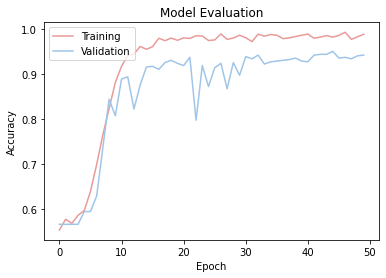

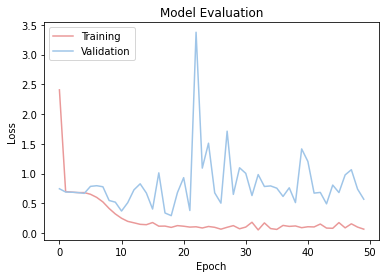

(<keras.callbacks.History at 0x177674a30>,
 <keras.engine.functional.Functional at 0x17879da60>)

In [5]:
callback = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy", patience=10, restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        '../models/best_model.keras', monitor="val_accuracy", save_best_only=True, verbose=1
    )
]

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(image_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dropout(0.1)(y)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)

z = layers.Concatenate()([x, y])
z = layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.00002))(z)
z = layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.00002))(z)
z = layers.Dense(1, activation="sigmoid")(z)

helpers.run_model(
    [image_input, feature_input],
    z,
    train_dataset,
    val_dataset,
    epochs=50,
    callback=callback,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>4.4 Evaluating the Best Performing Model</h1>
</div>

In [6]:
# loading the best model
model = keras.models.load_model('../models/best_model.keras')

# evaluate the model
model.evaluate(test_dataset)

2022-09-01 07:53:00.893516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 1s 8ms/step - loss: 0.7303 - accuracy: 0.9552


[0.7303178310394287, 0.9551793336868286]

<div style="font-size: 30px; padding:10px">
<h1>4.5 Summary</h1>

<p>
The best performing model gives an accuracy of <code>95.51%</code>
</p>
<h1>4.6 References</h1>

<p>[1] Chollet, François. Deep Learning With Python (1st ed.). </p>


</div>

----
<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">End of File</div>

----